In [1]:
from hashlib import md5
import pandas as pd
import json
import statsmodels.api as sm
import numpy as np
from sklearn import datasets
from random import randint, random

In [110]:
objs = []
for i in range(1,1000):
    obj = {}
    obj['Year'] = randint(1970,2018)
    obj['Country ID'] = md5(str(randint(0,100)).encode('utf-8')).hexdigest()
    obj['GDP'] = randint(100*10**9, 1*10**12) # dollars
    obj['Population'] = randint(50*10**6, 500*10**6) # people
    obj['Infrastructure Investment'] = (randint(1000,10000)/100000) * obj['GDP'] # dollars
    obj['Healthcare Spending'] = (randint(3000,30000)/100000) * obj['GDP'] # dollars
    obj['Steel Production'] = randint(0,100*10**6) # metric tons
    obj['Crop Yield'] = randint(1000*10**3,100000*10**3) # tons of wheat, maize, rice and soybean 
    obj['Timber Production'] = randint(1*10**6, 3*10**9) # kilograms
    obj['Electronics Manufacturing'] = (randint(1000,100000)/1000000) * obj['GDP'] # dollars
    obj['Oil Production'] = (randint(1000,100000)/1000000) * obj['GDP'] # dollars    
    obj['Military Output'] = obj['GDP']*random() + 2*obj['Steel Production'] + randint(1,2)*obj['Electronics Manufacturing'] + 1.2*obj['Oil Production'] - 0.25*obj['Healthcare Spending'] # dollars
    objs.append(obj)    

In [111]:
df = pd.DataFrame(objs)
y = df[['Military Output']]
x = df[['GDP','Population','Infrastructure Investment','Healthcare Spending','Steel Production','Crop Yield','Timber Production','Electronics Manufacturing','Oil Production']]

In [112]:
df.describe()

,Crop Yield,Electronics Manufacturing,GDP,Healthcare Spending,Infrastructure Investment,Military Output,Oil Production,Population,Steel Production,Timber Production,Year
count,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,999.000000
mean,4.931783e+07,2.839487e+10,5.459508e+11,9.098415e+10,2.979898e+10,3.274667e+11,2.761687e+10,2.724141e+08,4.948670e+07,1.474020e+09,1993.941942
std,2.859384e+07,2.175413e+10,2.625583e+11,6.516370e+10,2.137813e+10,2.348524e+11,2.138176e+10,1.304497e+08,2.908553e+07,8.737261e+08,13.919416
min,1.154121e+06,3.843547e+08,1.003383e+11,3.651795e+09,1.267266e+09,7.053605e+09,2.446946e+08,5.004907e+07,2.173300e+04,1.460796e+06,1970.000000
25%,2.448295e+07,1.049350e+10,3.110857e+11,3.708484e+10,1.181282e+10,1.311685e+11,1.014055e+10,1.598223e+08,2.366516e+07,7.179332e+08,1982.000000
50%,5.025428e+07,2.280173e+10,5.438412e+11,7.212675e+10,2.401174e+10,2.696898e+11,2.236355e+10,2.722534e+08,4.978963e+07,1.444998e+09,1994.000000
75%,7.331563e+07,4.280303e+10,7.784165e+11,1.358210e+11,4.295194e+10,4.782984e+11,4.047243e+10,3.844300e+08,7.542380e+07,2.242135e+09,2006.000000
max,9.987997e+07,9.608803e+10,9.991943e+11,2.943346e+11,9.620214e+10,1.064640e+12,9.580264e+10,4.997625e+08,9.979617e+07,2.992433e+09,2018.000000


In [113]:
mod = sm.OLS(y,x)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        Military Output   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     505.8
Date:                Sat, 05 Jan 2019   Prob (F-statistic):               0.00
Time:                        11:51:09   Log-Likelihood:                -27252.
No. Observations:                 999   AIC:                         5.452e+04
Df Residuals:                     990   BIC:                         5.457e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
GDP                   

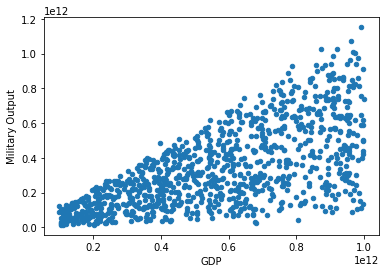

In [90]:
df.plot.scatter('GDP','Military Output')

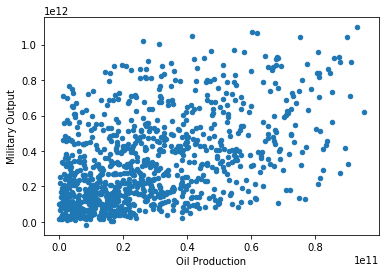

In [99]:
df.plot.scatter('Oil Production', 'Military Output')

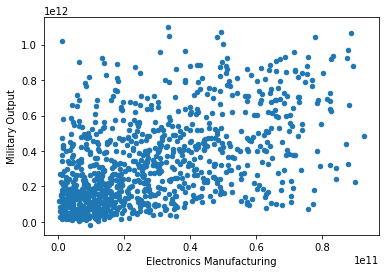

In [100]:
df.plot.scatter('Electronics Manufacturing', 'Military Output')

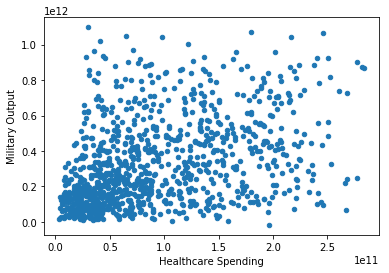

In [101]:
df.plot.scatter('Healthcare Spending','Military Output')

In [116]:
df.to_csv('../Class Files/Scenario 3/Military_Production_Capacity.csv',index=False)